# Time Plot Gallery

Time plots are used for visualizing transactional data over time by aggregating data into specified periods (daily, weekly, monthly). They're essential for identifying trends, seasonal patterns, and performance variations across different timeframes.

Time plots excel at:
- **Trend Analysis**: Track sales performance across different time periods
- **Seasonal Patterns**: Identify cyclical behaviors and promotional impacts
- **Comparative Analysis**: Compare performance of different categories over time
- **Time-Based Insights**: Visualize customer behavior and transaction patterns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pyretailscience.plots import time

## Basic Time Series

Create a basic time plot from transaction data. The plot automatically aggregates the value column by the specified time period.

---

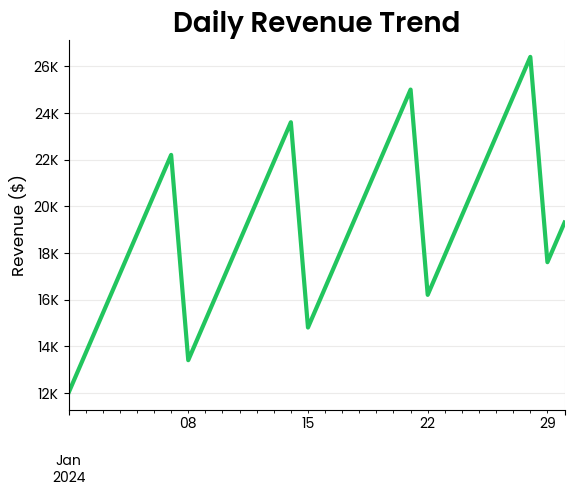

In [ ]:
# Create sample daily transaction data
daily_sales = pd.DataFrame(
    {
        "transaction_date": pd.date_range("2024-01-01", periods=30, freq="D"),
        "revenue": [12000 + i * 200 + (i % 7) * 1500 for i in range(30)],
    },
)

time.plot(
    daily_sales,
    value_col="revenue",
    title="Daily Revenue Trend",
    y_label="Revenue ($)",
)
plt.show()

## Different Time Periods

Use the `period` parameter to aggregate data by different time periods: daily ("D"), weekly ("W"), or monthly ("M").

---

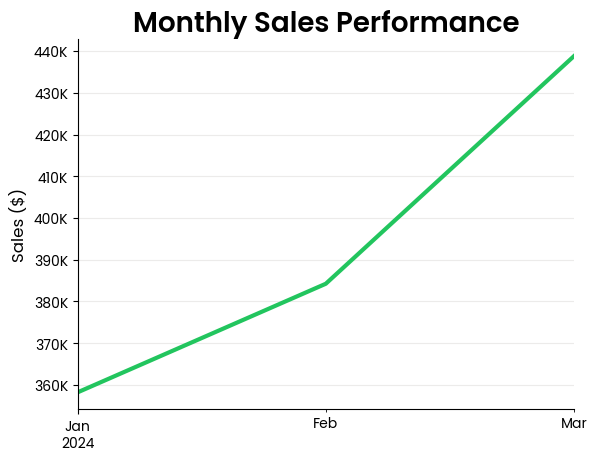

In [ ]:
# Create sample data spanning several months
monthly_data = pd.DataFrame(
    {
        "transaction_date": pd.date_range("2024-01-01", periods=90, freq="D"),
        "sales": [8000 + i * 50 + (i % 30) * 200 for i in range(90)],
    },
)

time.plot(
    monthly_data,
    value_col="sales",
    period="M",  # Monthly aggregation
    title="Monthly Sales Performance",
    y_label="Sales ($)",
)
plt.show()

## Different Aggregation Functions

Use `agg_func` to specify how values are aggregated: "sum" (default) or "mean" for averages.

---

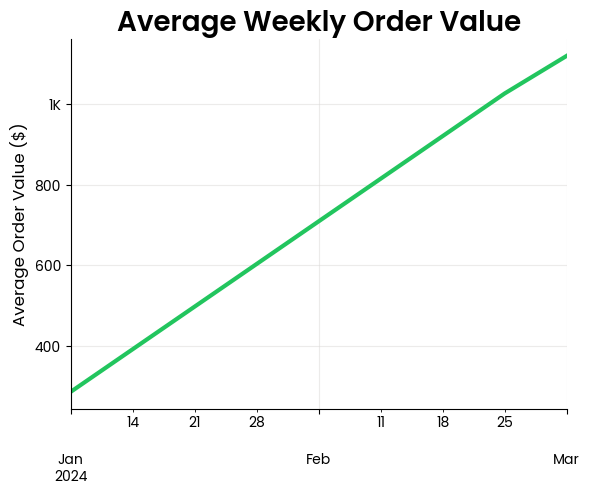

In [ ]:
# Create sample transaction data with multiple daily transactions
transaction_data = pd.DataFrame(
    {
        "transaction_date": pd.date_range("2024-01-01", periods=60, freq="D").repeat(3),
        "order_value": [150 + i * 5 + (i % 10) * 20 for i in range(180)],
    },
)

time.plot(
    transaction_data,
    value_col="order_value",
    period="W",  # Weekly aggregation
    agg_func="mean",  # Average instead of sum
    title="Average Weekly Order Value",
    y_label="Average Order Value ($)",
)
plt.show()

## Grouped by Category

Use `group_col` to compare performance across different categories over time.

---

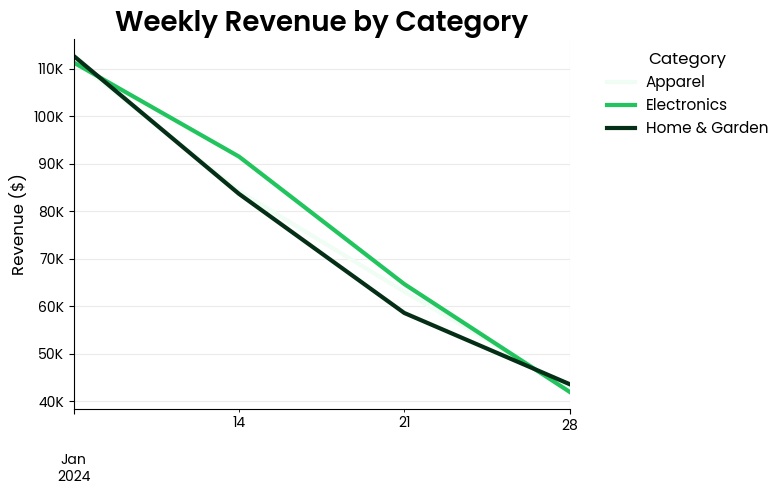

In [ ]:
# Create sample data with multiple product categories
# fmt: off
category_sales = pd.DataFrame({
    "transaction_date": pd.date_range("2024-01-01", periods=28, freq="D").repeat(3),
    "category": ["Electronics", "Apparel", "Home & Garden"] * 28,
    "revenue": (
        # Electronics - higher values, steady growth
        [15000 + i * 100 for i in range(28)] +
        # Apparel - seasonal pattern
        [8000 + i * 50 + (i % 7) * 500 for i in range(28)] +
        # Home & Garden - lower values, volatile
        [5000 + i * 30 + (i % 5) * 300 for i in range(28)]
    ),
})
# fmt: on

time.plot(
    category_sales,
    value_col="revenue",
    group_col="category",
    period="W",  # Weekly aggregation
    title="Weekly Revenue by Category",
    y_label="Revenue ($)",
    legend_title="Category",
    move_legend_outside=True,
)
plt.show()